In [10]:
using DataFrames
using MLBase
using Plots
using Statistics
using StatsBase
using StatsPlots
using XLSX

gr()

Plots.GRBackend()

In [2]:
ENV["GKS_ENCODING"] = "utf-8"

"utf-8"

In [54]:
stateabbrs = Dict(
    "Alabama" => "AL",
    "Alaska" => "AK",
    "Arizona" => "AZ",
    "Arkansas" => "AR",
    "California" => "CA",
    "Colorado" => "CO",
    "Connecticut" => "CN",
    "Delaware" => "DE",
    "District of Columbia" => "DC",
    "Florida" => "FL",
    "Georgia" => "GA",
    "Hawaii" => "HI",
    "Idaho" => "ID",
    "Illinois" => "IL",
    "Indiana" => "IN",
    "Iowa" => "IA",
    "Kansas" => "KA",
    "Kentucky" => "KY",
    "Louisiana" => "LA",
    "Maine" => "ME",
    "Maryland" => "MD",
    "Massachusetts" => "MA",
    "Michigan" => "MI",
    "Minnesota" => "MN",
    "Mississippi" => "MS",
    "Missouri" => "MO",
    "Montana" => "MT",
    "Nebraska" => "NE",
    "Nevada" => "NV",
    "New Hampshire" => "NH", 
    "New Jersey" => "NJ",
    "New Mexico" => "NM",
    "New York" => "NY",
    "North Carolina" => "NC", 
    "North Dakota" => "ND",
    "Ohio" => "OH",
    "Oklahoma" => "OK",
    "Oregon" => "OR",
    "Pennsylvania" => "PN", 
    "Rhode Island" => "RI",
    "South Carolina" => "SC",
    "South Dakota" => "SD",
    "Tennessee" => "TN",
    "Texas" => "TX",
    "Utah" => "UT",
    "Vermont" => "VT", 
    "Virginia" => "VA",
    "Washington" => "WA",
    "West Virginia" => "WV",
    "Wisconsin" => "WI",
    "Wyoming" => "WY")

Dict{String,String} with 51 entries:
  "Colorado"       => "CO"
  "Texas"          => "TX"
  "Alabama"        => "AL"
  "Vermont"        => "VT"
  "Missouri"       => "MO"
  "Wyoming"        => "WY"
  "California"     => "CA"
  "Maine"          => "ME"
  "Tennessee"      => "TN"
  "Nevada"         => "NV"
  "Kentucky"       => "KY"
  "Delaware"       => "DE"
  "Indiana"        => "IN"
  "South Carolina" => "SC"
  "Nebraska"       => "NE"
  "Arizona"        => "AZ"
  "Connecticut"    => "CN"
  "Illinois"       => "IL"
  "Maryland"       => "MD"
  "Kansas"         => "KA"
  "New York"       => "NY"
  "Arkansas"       => "AR"
  "Minnesota"      => "MN"
  "South Dakota"   => "SD"
  "Wisconsin"      => "WI"
  ⋮                => ⋮

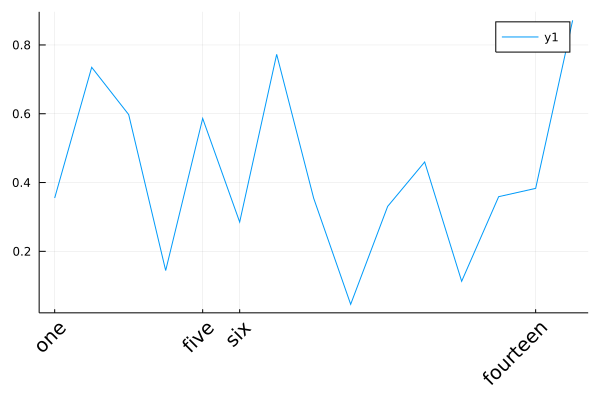

In [7]:
xtickslabels = ["one", "five", "six", "fourteen"]
p = plot(rand(15), 
         xticks=([1, 5, 6, 14], xtickslabels), 
         xrotation=45, 
         xtickfont=font(13))

In [12]:
d = DataFrame(
    XLSX.readtable("zillow_data_download_april2020.xlsx", 
                   "Sales_median_price_city"
    )...)
dropmissing!(d)
states = d[:, :StateName]

1174-element Array{Any,1}:
 "California"
 "Texas"
 "Illinois"
 "Texas"
 "Pennsylvania"
 "Arizona"
 "Nevada"
 "Texas"
 "Texas"
 "California"
 "California"
 "North Carolina"
 "Texas"
 ⋮
 "Pennsylvania"
 "Colorado"
 "Pennsylvania"
 "Florida"
 "Pennsylvania"
 "California"
 "Florida"
 "Pennsylvania"
 "New Jersey"
 "Florida"
 "Arizona"
 "Florida"

In [14]:
nyids = findall(states .== "New York")
caids = findall(states .== "California")
flids = findall(states .== "Florida")
nyframe = dropmissing(d[nyids, :])
caframe = dropmissing(d[caids, :])
flframe = dropmissing(d[flids, :]);

In [18]:
ca = caframe[!, Symbol("2020-02")]
ny = nyframe[!, Symbol("2020-02")]
fl = flframe[!, Symbol("2020-02")];

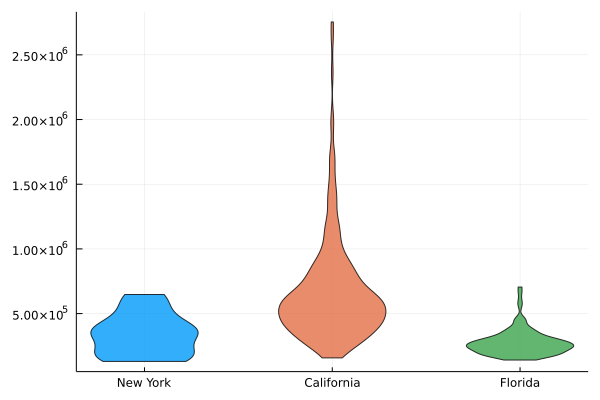

In [19]:
violin(["New York"], ny, legend=false, alpha=0.8)
violin!(["California"], ca, alpha=0.8)
violin!(["Florida"], fl, alpha=0.8)

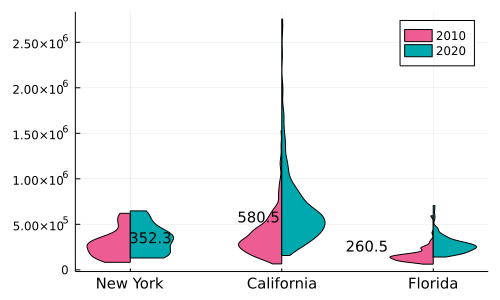

In [39]:
ca10 = caframe[!, Symbol("2010-02")]
ny10 = nyframe[!, Symbol("2010-02")]
fl10 = flframe[!, Symbol("2010-02")]
violin(["New York"], ny10, side=:left, color=7, label="2010")
violin!(["New York"], ny, side=:right, color=6, label="2020")
violin!(["California"], ca10, side=:left, color=7, label="")
violin!(["California"], ca, side=:right, color=6, label="")
violin!(["Florida"], fl10, side=:left, color=7, label="")
violin!(["Florida"], fl, side=:right, color=6, label="")

ep = 0.
for (i, state) in enumerate([ny, ca, fl])
    m = median(state)
    annotate!([(i - 0.5, m + 0.05, text(m / 1000, 10, :left))])
end

plot!(xtickfont=font(10), size=(500, 300))

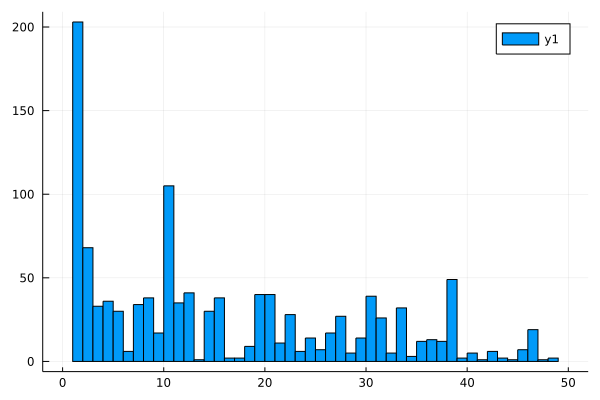

In [42]:
mapstates = labelmap(states)
stateids = labelencode(mapstates, states)
histogram(stateids, nbins=50)

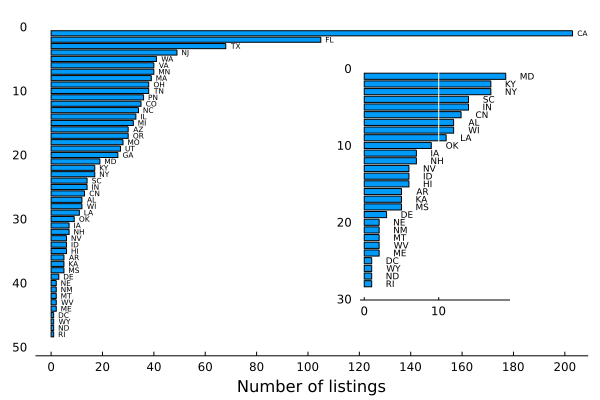

In [69]:
h = fit(Histogram, stateids, nbins=50)
sortids = sortperm(h.weights, rev=true)
bar(h.weights[sortids], legend=false, orientation=:horizontal, yflip=true)

stateannot = mapstates.vs[sortids]
for i = 1:length(stateannot)
    annotate!([
        (h.weights[sortids][i] + 2, 
        i, 
        text(stateabbrs[stateannot[i]], 5, :left))])
end
plot!(grid=false, yaxis=false, xticks=0:20:200)
xlabel!("Number of listings")

f = Plots.plot!(inset=bbox(0.6, 0.15, 0.25, 0.6, :top, :left))
bar!(f[2], 
     h.weights[sortids][21:end], 
     legend=false, 
     orientation=:horizontal, 
     yflip=true)
for i = 21:length(stateannot)
    annotate!(f[2], 
              [(h.weights[sortids][i] + 2, 
                i - 20, 
                text(stateabbrs[stateannot[i]], 
                6, 
                :left))])
end
plot!(f[2], 
      [10, 10], 
      [20, 0], 
      color=:white, 
      xticks=0:10:20, 
      yaxis=false, 
      grid=false)
plot!()

In [70]:
M = Matrix(nyframe[:, 5:end])
xticklabels = string.(names(nyframe[!, 5:end]));